## Fine-Tuning Your Model

### Confusion Matrix

Compares the training scores with actual data (or test) score in a 2x2 matrix

In [2]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


------------------------------------------
✅ Runtime: 1350.3 ms | 💾 Mem: 204.67 MB (Δ +128.92 MB) | ⚙️ CPU: 14.3%


In [3]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



------------------------------------------
✅ Runtime: 16.1 ms | 💾 Mem: 204.19 MB (Δ -0.48 MB) | ⚙️ CPU: 68.9%


In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [5]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


------------------------------------------
✅ Runtime: 3.7 ms | 💾 Mem: 205.17 MB (Δ +0.20 MB) | ⚙️ CPU: 71.1%


In [6]:
steps = [('knn', KNeighborsClassifier(n_neighbors=7))]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


------------------------------------------
✅ Runtime: 8.5 ms | 💾 Mem: 205.41 MB (Δ +0.23 MB) | ⚙️ CPU: 20.0%


### Evaluation

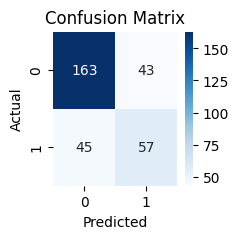


------------------------------------------
✅ Runtime: 95.2 ms | 💾 Mem: 207.66 MB (Δ +2.25 MB) | ⚙️ CPU: 11.9%


In [7]:
plt.figure(figsize=(2,2))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       206
           1       0.57      0.56      0.56       102

    accuracy                           0.71       308
   macro avg       0.68      0.68      0.68       308
weighted avg       0.71      0.71      0.71       308


------------------------------------------
✅ Runtime: 5.7 ms | 💾 Mem: 207.66 MB (Δ +0.00 MB) | ⚙️ CPU: 22.5%


In [9]:
print(pipeline.score(X_test, y_test))

0.7142857142857143

------------------------------------------
✅ Runtime: 2.8 ms | 💾 Mem: 207.73 MB (Δ +0.08 MB) | ⚙️ CPU: 62.8%


### Logistic regression
Used for binary classification, because it works supprizingly well

- Spam or not spam
- Customer will buy or not buy
- Patient has a disease or not

ML People Use It For

- Classification baseline model
- Medical risk predictions
- Credit scoring
- Anomaly detection (with thresholding)
- Any situation where interpretability matters

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
print("Accuracy:", logreg.score(X_test_scaled, y_test))


Accuracy: 0.7564935064935064

------------------------------------------
✅ Runtime: 6.4 ms | 💾 Mem: 98.16 MB (Δ +0.20 MB) | ⚙️ CPU: 32.6%


In [20]:
# Predicting probability
y_pred_probs = logreg.predict_proba(X_test_scaled)[:, 1]
print(y_pred_probs[0])

0.30759308442680394

------------------------------------------
✅ Runtime: 0.6 ms | 💾 Mem: 98.16 MB (Δ +0.00 MB) | ⚙️ CPU: 20.9%


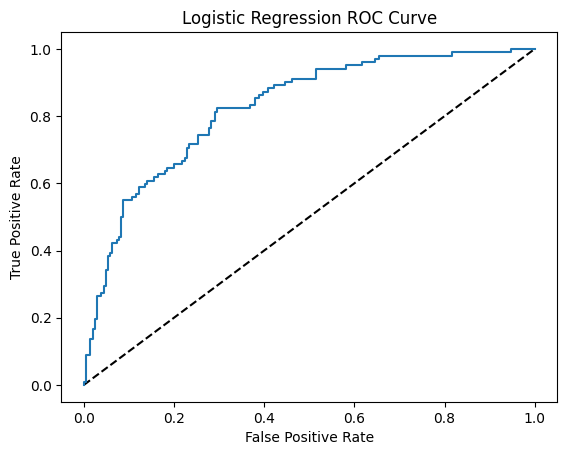


------------------------------------------
✅ Runtime: 59.4 ms | 💾 Mem: 108.55 MB (Δ -21.05 MB) | ⚙️ CPU: 73.2%


In [22]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_probs)
print("AUC:", auc)

AUC: 0.8250523510375023

------------------------------------------
✅ Runtime: 7.1 ms | 💾 Mem: 85.73 MB (Δ +9.64 MB) | ⚙️ CPU: 30.2%
